In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.2.2
torchvision version: 0.17.2


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
# MacoOS device agnostic code:

if torch.cuda.is_available():
    device = "cuda" # Use NVIDIA GPU (if available)
elif torch.backends.mps.is_available():
    device = "mps" # Use Apple Silicon GPU (if available)
else:
    device = "cpu" # Default to CPU if no GPU is available
    
device

'mps'

In [3]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data" # where to download data to?
    , train=True # get training data
    , download=True # download data if it doesn't exist on disk
    , transform=ToTensor() # images come as PIL format, we want to turn into Torch tensors
    , target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data"
    , train=False # get test data
    , download=True
    , transform=ToTensor()
)

100%|█████████████████████████| 26421880/26421880 [00:01<00:00, 14770032.08it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|█████████████████████████████████| 29515/29515 [00:00<00:00, 197465.83it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|████████████████████████████| 4422102/4422102 [00:01<00:00, 4367163.44it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|█████████████████████████████████| 5148/5148 [00:00<00:00, 11754097.44it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [5]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [11]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [10]:
train_data.data.shape, train_data.targets.shape, test_data.data.shape, test_data.targets.shape

(torch.Size([60000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000, 28, 28]),
 torch.Size([10000]))

In [12]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


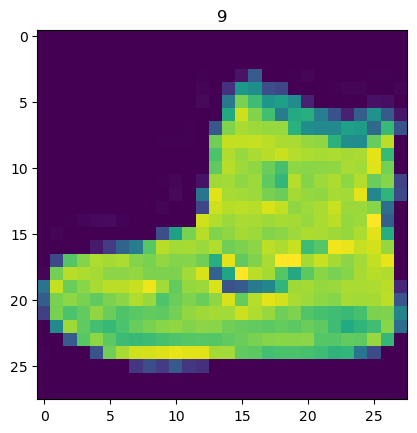

In [13]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

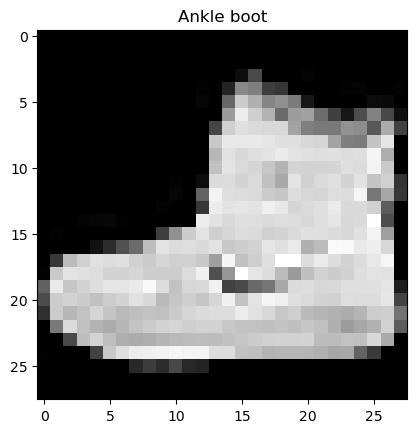

In [14]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

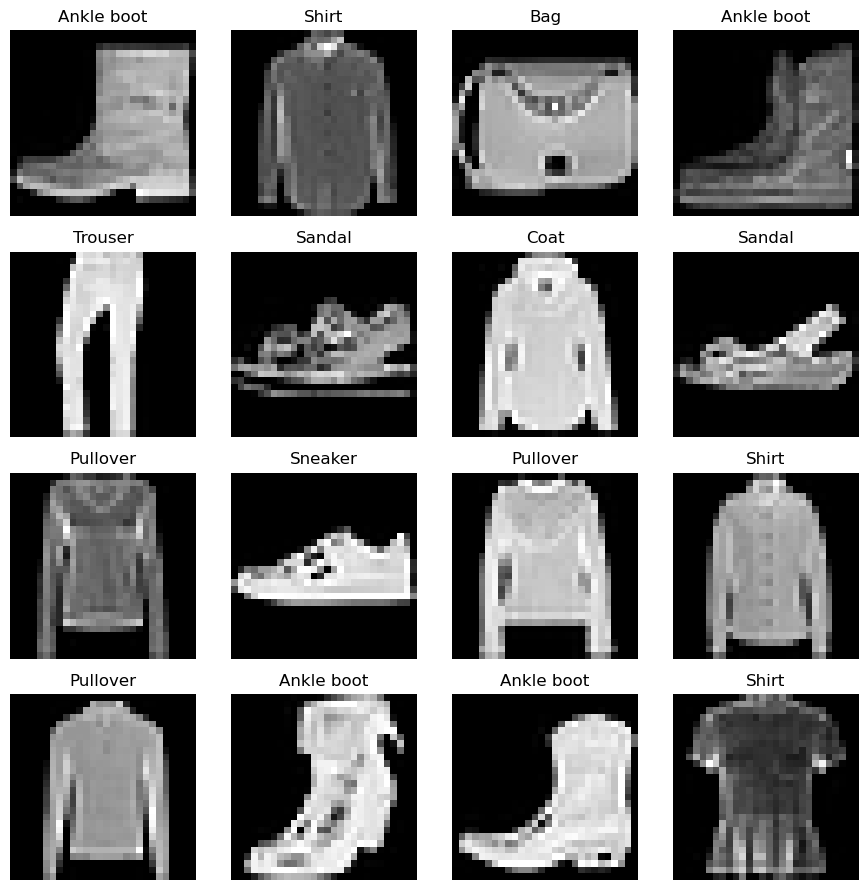

In [15]:
torch.manual_seed(42)  # prevents printing the Generator
rows, cols = 4, 4
fig = plt.figure(figsize=(9, 9))

for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), (1,)).item()
    img, label = train_data[random_idx]

    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img.squeeze(), cmap="gray")      # this will suppress echo
    ax.set_title(class_names[label])           # and this will too..
    ax.set_axis_off()                          # no echo here... ;)

plt.tight_layout()
plt.show();

In [16]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(
    train_data # dataset to turn into iterable
    , batch_size=BATCH_SIZE # how many samples per batch? 
    , shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(
    test_data, batch_size=BATCH_SIZE
    , shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x146ca0dd0>, <torch.utils.data.dataloader.DataLoader object at 0x1284605d0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [17]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))


Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


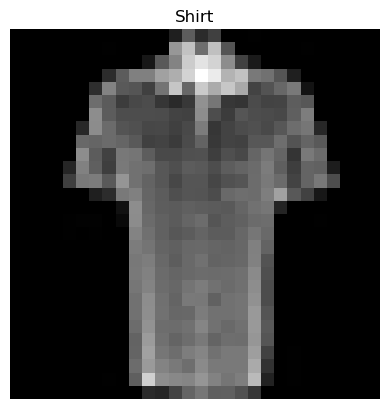

In [18]:
# Show a sample
torch.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");

print(f"\nImage size: {img.shape}");
print(f"Label: {label}, label size: {label.shape}");

In [21]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [24]:
print(x)
print(output)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078, 0.0000,
          0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000,

In [28]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [32]:
# Import accuracy metric
from helper_functions import accuracy_fn 
# Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

import torchmetrics

accuracy_torch_fn = torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

accuracy_fn
accuracy_torch_fn

<function helper_functions.accuracy_fn(y_true, y_pred)>

MulticlassAccuracy()

In [35]:
from timeit import default_timer as timer 

def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [36]:
# Functionize the train & test loop(s):

def train_step(model: torch.nn.Module
               , data_loader: torch.utils.data.DataLoader
               , loss_fn: torch.nn.Module
               , optimizer: torch.optim.Optimizer
               , accuracy_fn
               , device: torch.device = device):
    
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(
            y_true=y
            , y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(
    data_loader: torch.utils.data.DataLoader
    , model: torch.nn.Module
    , loss_fn: torch.nn.Module
    , accuracy_fn
    , device: torch.device = device):
    
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(
                y_true=y
                , y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [37]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module
               , data_loader: torch.utils.data.DataLoader
               , loss_fn: torch.nn.Module
               , accuracy_fn
               , device: torch.device = device):   
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(
                y_true=y
                , y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__ # only works when model was created with a class
            , "model_loss": loss.item()
            , "model_acc": acc}

In [39]:
# Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape 
                , out_channels=hidden_units
                , kernel_size=3 # how big is the square that's going over the image?
                , stride=1 # default
                , padding=1) # "valid" (no pad) or "same" (output same shape as input) or int for spec num 
            , nn.ReLU()
            , nn.Conv2d(in_channels=hidden_units 
                      , out_channels=hidden_units
                      , kernel_size=3
                      , stride=1
                      , padding=1)
            , nn.ReLU()
            , nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1)
            , nn.ReLU()
            , nn.Conv2d(hidden_units, hidden_units, 3, padding=1)
            , nn.ReLU()
            , nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten()
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            , nn.Linear(in_features=hidden_units*7*7 
                      , out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [89]:
device

'mps'

In [90]:
torch.manual_seed(27)
model_2 = FashionMNISTModelV2(
    input_shape=1
    , hidden_units=16
    , output_shape=len(class_names)
).to(device)

model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
  )
)

In [91]:
# Setup loss and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_2.parameters()
    , lr=0.01)

In [44]:
from tqdm.auto import tqdm

In [47]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 6
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader 
        , model=model_2
        , loss_fn=loss_fn
        , optimizer=optimizer
        , accuracy_fn=accuracy_fn
        , device=device
    )
    test_step(data_loader=test_dataloader
        , model=model_2
        , loss_fn=loss_fn
        , accuracy_fn=accuracy_fn
        , device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(
    start=train_time_start_model_2
    , end=train_time_end_model_2
    , device=device)

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.29455 | Train accuracy: 89.24%
Test loss: 0.31048 | Test accuracy: 88.83%

Epoch: 1
---------
Train loss: 0.27916 | Train accuracy: 89.94%
Test loss: 0.29240 | Test accuracy: 89.12%

Epoch: 2
---------
Train loss: 0.26839 | Train accuracy: 90.33%
Test loss: 0.30387 | Test accuracy: 89.05%

Epoch: 3
---------
Train loss: 0.26076 | Train accuracy: 90.64%
Test loss: 0.29283 | Test accuracy: 89.64%

Epoch: 4
---------
Train loss: 0.25479 | Train accuracy: 90.81%
Test loss: 0.28630 | Test accuracy: 89.79%

Epoch: 5
---------
Train loss: 0.24967 | Train accuracy: 90.91%
Test loss: 0.27798 | Test accuracy: 90.12%

Train time on mps: 335.159 seconds


In [46]:
# Get model_2 results 
model_2_results = eval_model(
    model=model_2
    , data_loader=test_dataloader
    , loss_fn=loss_fn
    , accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3219028115272522,
 'model_acc': 88.4285143769968}

In [63]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

torch.manual_seed(27)
model_3 = FashionMNISTModelV2(
    input_shape=1
    , hidden_units=32
    , output_shape=len(class_names)
).to(device)

model_3

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1568, out_features=10, bias=True)
  )
)

In [87]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_3.parameters()
    , lr=0.01)

In [88]:
torch.manual_seed(27)

# Measure time
from timeit import default_timer as timer
train_time_start_model_3 = timer()

# Train and test model 
epochs = 9
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader 
        , model=model_3
        , loss_fn=loss_fn
        , optimizer=optimizer
        , accuracy_fn=accuracy_fn
        , device=device
    )
    test_step(data_loader=test_dataloader
        , model=model_3
        , loss_fn=loss_fn
        , accuracy_fn=accuracy_fn
        , device=device
    )

train_time_end_model_3 = timer()
total_train_time_model_3 = print_train_time(
    start=train_time_start_model_3
    , end=train_time_end_model_3
    , device=device)

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.10645 | Train accuracy: 96.22%
Test loss: 0.25240 | Test accuracy: 91.97%

Epoch: 1
---------
Train loss: 0.10460 | Train accuracy: 96.38%
Test loss: 0.25005 | Test accuracy: 92.01%

Epoch: 2
---------
Train loss: 0.10258 | Train accuracy: 96.37%
Test loss: 0.25389 | Test accuracy: 91.97%

Epoch: 3
---------
Train loss: 0.10058 | Train accuracy: 96.46%
Test loss: 0.25864 | Test accuracy: 91.87%

Epoch: 4
---------
Train loss: 0.09902 | Train accuracy: 96.53%
Test loss: 0.25443 | Test accuracy: 92.02%

Epoch: 5
---------
Train loss: 0.09625 | Train accuracy: 96.67%
Test loss: 0.26523 | Test accuracy: 91.93%

Epoch: 6
---------
Train loss: 0.09438 | Train accuracy: 96.72%
Test loss: 0.26595 | Test accuracy: 92.01%

Epoch: 7
---------
Train loss: 0.09222 | Train accuracy: 96.77%
Test loss: 0.27297 | Test accuracy: 91.95%

Epoch: 8
---------
Train loss: 0.09014 | Train accuracy: 96.86%
Test loss: 0.26721 | Test accuracy: 92.09%

Train time on mps: 555.924 s

In [85]:
# Get model_2 results 
model_3_results = eval_model(
    model=model_3
    , data_loader=test_dataloader
    , loss_fn=loss_fn
    , accuracy_fn=accuracy_fn
)
model_3_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2466222494840622,
 'model_acc': 92.06269968051119}

In [82]:
# Get model_2 results 
model_3_results = eval_model(
    model=model_3
    , data_loader=test_dataloader
    , loss_fn=loss_fn
    , accuracy_fn=accuracy_fn
)
model_3_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.23812277615070343,
 'model_acc': 92.1026357827476}

In [ ]:
"""
# lr=0.007; h/u=32:

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.23812277615070343,
 'model_acc': 92.1026357827476}

<torch._C.Generator at 0x10c154cb0>
100%
 9/9 [09:12<00:00, 61.46s/it]
Epoch: 0
---------
Train loss: 0.11843 | Train accuracy: 95.84%
Test loss: 0.23914 | Test accuracy: 92.13%

Epoch: 1
---------
Train loss: 0.11679 | Train accuracy: 95.89%
Test loss: 0.23882 | Test accuracy: 92.00%

Epoch: 2
---------
Train loss: 0.11516 | Train accuracy: 96.00%
Test loss: 0.23933 | Test accuracy: 92.22%

Epoch: 3
---------
Train loss: 0.11382 | Train accuracy: 96.06%
Test loss: 0.24243 | Test accuracy: 91.96%

Epoch: 4
---------
Train loss: 0.11238 | Train accuracy: 96.08%
Test loss: 0.23996 | Test accuracy: 92.11%

Epoch: 5
---------
Train loss: 0.11032 | Train accuracy: 96.16%
Test loss: 0.24535 | Test accuracy: 92.02%

Epoch: 6
---------
Train loss: 0.10877 | Train accuracy: 96.28%
Test loss: 0.24819 | Test accuracy: 92.09%

Epoch: 7
---------
Train loss: 0.10700 | Train accuracy: 96.20%
Test loss: 0.25138 | Test accuracy: 91.95%

Epoch: 8
---------
Train loss: 0.10537 | Train accuracy: 96.36%
Test loss: 0.24662 | Test accuracy: 92.06%

Train time on mps: 552.609 seconds

"""

In [ ]:
# Create a convolutional neural network 
class FashionMNISTModelV3(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape 
                , out_channels=hidden_units
                , kernel_size=3 # how big is the square that's going over the image?
                , stride=1 # default
                , padding=1) # "valid" (no pad) or "same" (output same shape as input) or int for spec num 
            , nn.ReLU()
            , nn.Conv2d(in_channels=hidden_units 
                      , out_channels=hidden_units
                      , kernel_size=3
                      , stride=1
                      , padding=1)
            , nn.ReLU()
            , nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1)
            , nn.ReLU()
            , nn.Conv2d(hidden_units, hidden_units, 3, padding=1)
            , nn.ReLU()
            , nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten()
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            , nn.Linear(in_features=hidden_units*7*7 
                      , out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [59]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

torch.manual_seed(27)
model_4 = FashionMNISTModelV2(
    input_shape=1
    , hidden_units=64
    , output_shape=len(class_names)
).to(device)

model_4

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=10, bias=True)
  )
)

In [60]:
# REMEMBER: If you spin up additional models to test new params, hidden layers, neurons, etc. REMEMBER TO RE-RUN THE OPTIMIZER AND LOSS_FN FOR THAT MODEL!!! (otherwise, you will get abysmally low acc rates!!!)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_4.parameters()
    , lr=0.1)

In [61]:
torch.manual_seed(27)

# Measure time
from timeit import default_timer as timer
train_time_start_model_4 = timer()

# Train and test model 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader 
        , model=model_4
        , loss_fn=loss_fn
        , optimizer=optimizer
        , accuracy_fn=accuracy_fn
        , device=device
    )
    test_step(data_loader=test_dataloader
        , model=model_4
        , loss_fn=loss_fn
        , accuracy_fn=accuracy_fn
        , device=device
    )

train_time_end_model_4= timer()
total_train_time_model_4= print_train_time(
    start=train_time_start_model_4
    , end=train_time_end_model_4
    , device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.49425 | Train accuracy: 82.28%
Test loss: 0.39540 | Test accuracy: 85.94%

Epoch: 1
---------
Train loss: 0.29516 | Train accuracy: 89.44%
Test loss: 0.28247 | Test accuracy: 89.87%

Epoch: 2
---------
Train loss: 0.25365 | Train accuracy: 90.91%
Test loss: 0.26480 | Test accuracy: 90.23%

Train time on mps: 193.770 seconds


In [62]:
# Get model_2 results 
model_4_results = eval_model(
    model=model_4
    , data_loader=test_dataloader
    , loss_fn=loss_fn
    , accuracy_fn=accuracy_fn
)
model_4_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2647961974143982,
 'model_acc': 90.22563897763578}